In [1]:
import requests
from bs4 import BeautifulSoup
import csv

# Base URL
base_url = "https://www.boxofficemojo.com/year/world/"

# CSV file setup
csv_file = open('box_office_data.csv', 'w', newline='', encoding='utf-8')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['Year', 'Rank', 'Release Group', 'Worldwide', 'Domestic', 'Domestic %', 'Foreign', 'Foreign %'])

# Loop through the years
for year in range(2000, 2024):
    # Construct URL
    url = f"{base_url}{year}/"

    # Fetch the webpage
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find the table and rows
    table = soup.find('table')
    rows = table.find_all('tr')[1:]  # Skip the header row

    # Extract data from each row
    for row in rows:
        cols = row.find_all('td')
        if len(cols) > 1:
            rank = cols[0].text.strip()
            release_group = cols[1].text.strip()
            worldwide = cols[2].text.strip()
            domestic = cols[3].text.strip()
            domestic_percent = cols[4].text.strip()
            foreign = cols[5].text.strip()
            foreign_percent = cols[6].text.strip()

            # Write to CSV
            csv_writer.writerow([year, rank, release_group, worldwide, domestic, domestic_percent, foreign, foreign_percent])

# Close the CSV file
csv_file.close()


In [25]:
import csv
import string

def normalize_title(title):
    # Convert to lower case and remove punctuation
    return title.lower().translate(str.maketrans('', '', string.punctuation))

# Read the box office data
with open('Numbers.csv', mode='r', encoding='utf-8') as file:
    box_office_reader = csv.DictReader(file)
    box_office_data = {normalize_title(row['Movie']): row for row in box_office_reader}

# Read the other CSV data
with open('Data/Final/output_movies_data_0-45k_by_year_2000+.csv', mode='r', encoding='utf-8') as file:
    other_reader = csv.DictReader(file)
    other_data = list(other_reader)

# Prepare for merging
merged_data = []
unmatched_movies = []
unmatched_count = 0

# Merge data
for row in other_data:
    normalized_title = normalize_title(row['name'])
    if normalized_title in box_office_data:
        merged_row = {**row, **box_office_data[normalized_title]}
        merged_data.append(merged_row)
    else:
        unmatched_movies.append(row['name'])
        unmatched_count += 1

# Write the merged data to a new CSV
with open('final_merged_Numbers.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=merged_data[0].keys())
    writer.writeheader()
    writer.writerows(merged_data)

# Print unmatched movies and their count
print("Unmatched Movies:", unmatched_movies)
print("Number of Unmatched Movies:", unmatched_count)


Unmatched Movies: ['Marisol', 'Still: A Michael J. Fox Movie', 'On Sacred Ground', 'Faraway', 'Doctor Jekyll', 'Live And Die In East LA', 'Monsters of California', 'Hot Potato: The Story of the Wiggles', 'The Ritual Killer', "There's Something Wrong with the Children", 'Stars Fell Again', 'Metalocalypse: Army of the Doomstar', 'Praise This', 'Mercy', 'Confidential Informant', 'Being Mary Tyler Moore', 'The Persian Version', 'Blue Giant', 'Evil Dead Rise', 'The Flood', 'Mission: Impossible - Dead Reckoning, Part One', 'Inside', 'The Wrath of Becky', "Mother's Day", 'Nanpakal Nerathu Mayakkam', 'Zombie Town', 'Sweetwater', 'Anthem', "Anna Nicole Smith: You Don't Know Me", "The Devil's Left Hand", 'Born to Fly', 'Peter Pan & Wendy', 'Chris Fleming: HELL', 'Mother, May I?', 'Dicks: The Musical', 'Dog Gone', 'Take Care of Maya', 'Sleep', "Guy Ritchie's The Covenant", 'Love Again', "The Magician's Elephant", 'Summer with the Guys', 'The Locksmith', 'Shooting Stars', 'Ghosted', 'Bottoms', 'Mi

/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


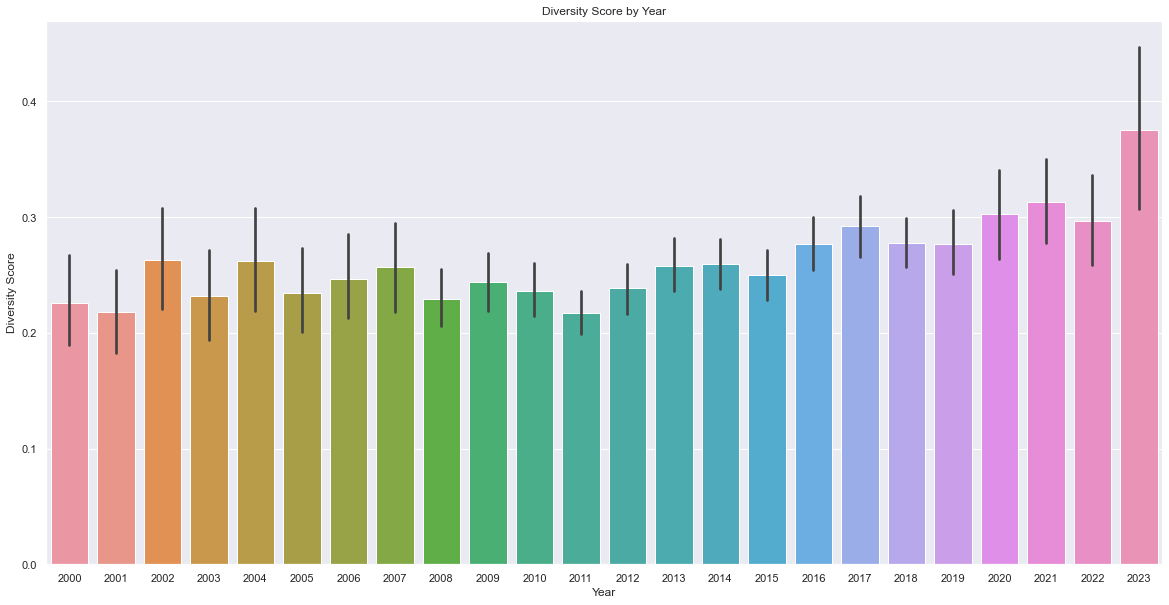

2000: 0.22589993931716093
2001: 0.21816848694671417
2002: 0.2625839446805222
2003: 0.2317859193638071
2004: 0.2617420678837162
2005: 0.23462449773552038
2006: 0.24680036407528286
2007: 0.25705378509708565
2008: 0.2293214779794398
2009: 0.24352756949390283
2010: 0.23651223830288398
2011: 0.21742924265569002
2012: 0.23841810133044353
2013: 0.2576141384663943
2014: 0.25899821950721724
2015: 0.24958857759951777
2016: 0.27669726644950166
2017: 0.29187101067061705
2018: 0.2772048727023206
2019: 0.27632385016942906
2020: 0.3022793489447853
2021: 0.3133635400325413
2022: 0.2969183263621964
2023: 0.3752624428454085


In [29]:
# create a line graph of diversity score over time (year)
# Path: diversity.ipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv('Merged_diversity_movies.csv')

# Create a bar graph of the diversity score by year
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x="year", y="diversity_score", data=df)
ax.set_title('Diversity Score by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Diversity Score')
plt.show()


# What is the average diversity score for each year (2000-2023 inclusive) print it in console

for year in range(2000, 2024):
    # Filter the dataframe by year
    df_year = df[df['year'] == year]

    # Calculate the average diversity score
    diversity_score_avg = df_year['diversity_score'].mean()

    # Print the average diversity score
    print(f"{year}: {diversity_score_avg}")




In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
df = pd.read_csv('Merged_diversity_movies.csv')

# Function to safely convert strings to floats
def safe_float_conversion(s):
    try:
        return float(s.replace(',', '').replace('$', ''))
    except ValueError:
        return np.nan


def convert_percentage_to_float(s):
    # Check if the input is already a numeric type (float or int)
    if isinstance(s, (float, int)):
        return s
    try:
        # If it's a string, remove '%' and convert to float
        return float(s.rstrip('%')) / 100
    except ValueError:
        # Return NaN for non-numeric strings
        return np.nan

# Apply this function to 'Domestic %' and 'Foreign %' columns

# Convert box office earnings to numeric
df['WorldwideGross'] = df['WorldwideGross'].replace('[\$,]', '', regex=True).apply(safe_float_conversion)
df['Production Budget'] = df['Production Budget'].replace('[\$,]', '', regex=True).apply(safe_float_conversion)

# Check the dataframe
print(df.head())


                                          name  tomatometer  audience_score  \
0                  The Super Mario Bros. Movie           59              95   
1                   Killers of the Flower Moon           93              84   
2                                       Fast X           56              84   
3                                  The Machine           32              87   
4  Teenage Mutant Ninja Turtles: Mutant Mayhem           96              90   

   weighted_score                                             genres rating  \
0              71  ['Kids & Family', 'Comedy', 'Adventure', 'Anim...     PG   
1              90                                 ['Crime', 'Drama']      R   
2              65                            ['Action', 'Adventure']  PG-13   
3              50                               ['Comedy', 'Action']      R   
4              94  ['Kids & Family', 'Comedy', 'Adventure', 'Anim...     PG   

  duration  year                                  

/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


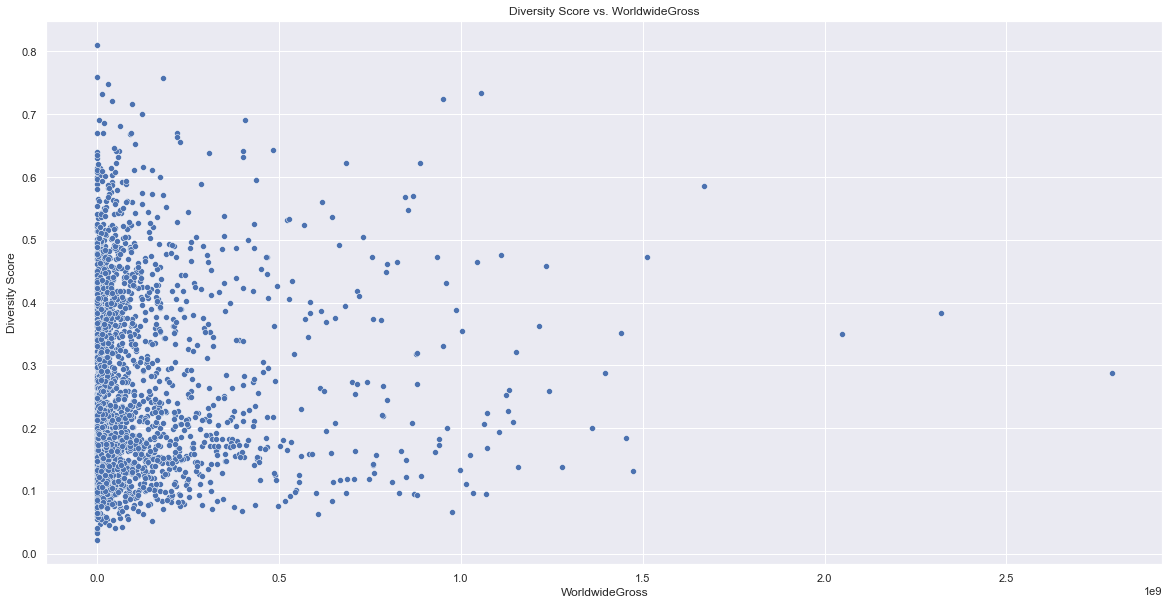

/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


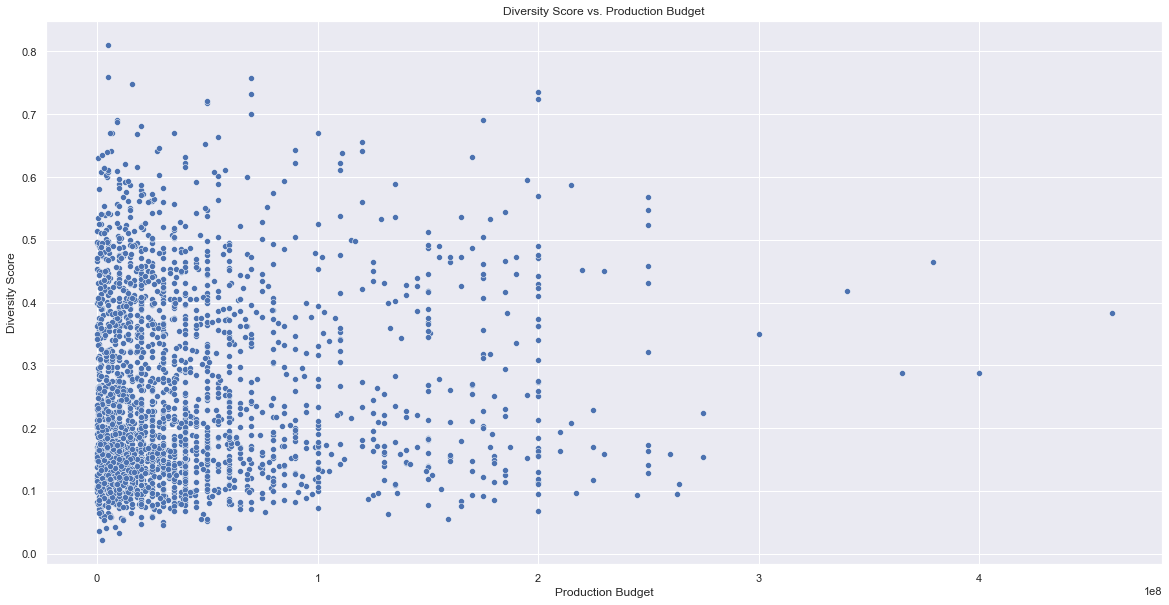

In [47]:
# List of numerical fields to plot against the diversity score
numerical_fields = ['WorldwideGross', 'Production Budget',]

# Loop through the numerical fields
for field in numerical_fields:
    # Create a scatter plot
    sns.set_theme(style="whitegrid")
    sns.set(rc={'figure.figsize':(20,10)})
    ax = sns.scatterplot(x=field, y='diversity_score', data=df)
    ax.set_title(f'Diversity Score vs. {field}')
    ax.set_xlabel(field)
    ax.set_ylabel('Diversity Score')
    plt.show()

In [24]:
# Selecting features for regression
features = df[numerical_fields]
target = df['diversity_score']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


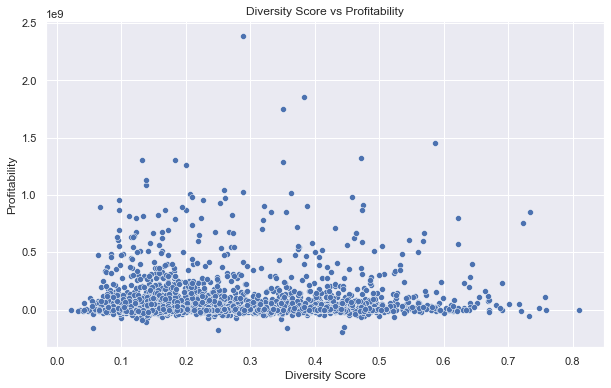

Correlation Coefficient: 0.03447626441922456
P-value: 0.09673120316688824
T-Statistic: 1.046654250408766
P-value (T-test): 0.2953725799449536
                                          name  tomatometer  audience_score  \
0                  The Super Mario Bros. Movie           59              95   
1                   Killers of the Flower Moon           93              84   
2                                       Fast X           56              84   
3                                  The Machine           32              87   
4  Teenage Mutant Ninja Turtles: Mutant Mayhem           96              90   

   weighted_score                                             genres rating  \
0              71  ['Kids & Family', 'Comedy', 'Adventure', 'Anim...     PG   
1              90                                 ['Crime', 'Drama']      R   
2              65                            ['Action', 'Adventure']  PG-13   
3              50                               ['Comedy', 'Action'

/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


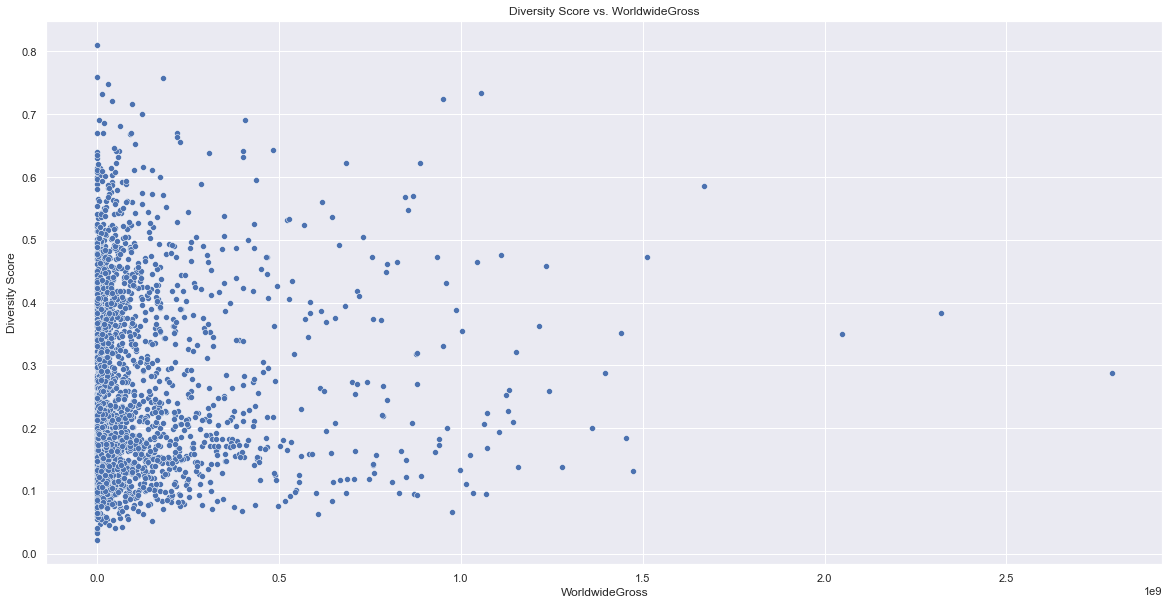

/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


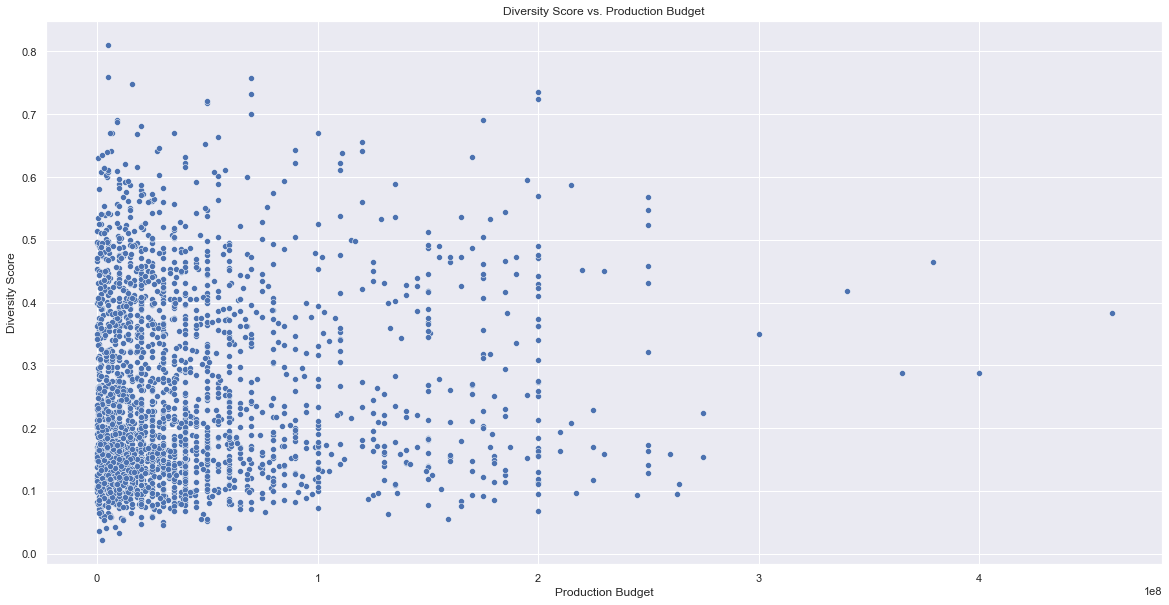

/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Mean Squared Error: 0.021351020364308616


/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


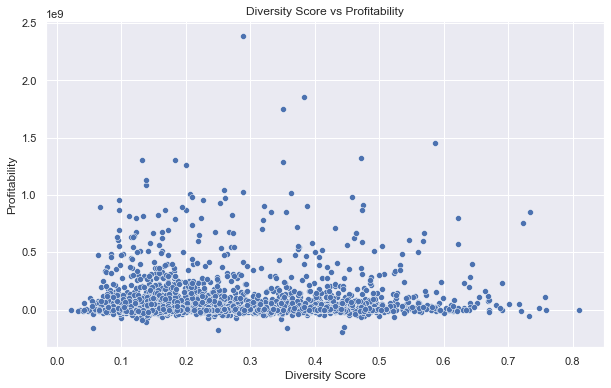

/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/devkalavadiya/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Correlation Coefficient: 0.03447626441922456
P-value: 0.09673120316688824
T-Statistic: 1.046654250408766
P-value (T-test): 0.2953725799449536


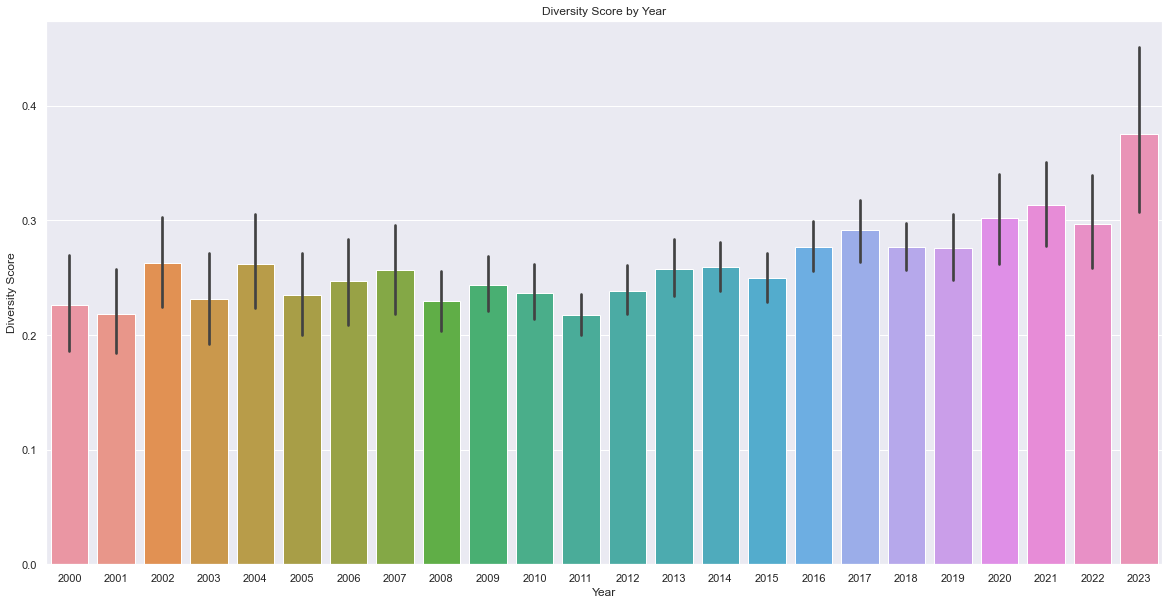

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


# Calculate profitability
df['profitability'] = df['WorldwideGross'] - df['Production Budget']

# df.head()

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='diversity_score', y='profitability')
plt.title('Diversity Score vs Profitability')
plt.xlabel('Diversity Score')
plt.ylabel('Profitability')
plt.show()


# correlation, p_value = stats.pearsonr(df['diversity_score'], df['profitability'])
# print(f"Correlation Coefficient: {correlation}")
# print(f"P-value: {p_value}")

# # Splitting data into high and low diversity

# Correlation
correlation, p_value = stats.pearsonr(df['diversity_score'], df['profitability'])
print(f"Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# T-test (splitting data into high and low diversity)
median_diversity = df['diversity_score'].median()
high_diversity = df[df['diversity_score'] > median_diversity]['profitability']
low_diversity = df[df['diversity_score'] <= median_diversity]['profitability']

t_stat, p_val_t_test = stats.ttest_ind(high_diversity, low_diversity, equal_var=False)
print(f"T-Statistic: {t_stat}")
print(f"P-value (T-test): {p_val_t_test}")


#multiple linear regression binned by year 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
df = pd.read_csv('Merged_diversity_movies.csv')

# Function to safely convert strings to floats
def safe_float_conversion(s):
    try:
        return float(s.replace(',', '').replace('$', ''))
    except ValueError:
        return np.nan
    
def convert_percentage_to_float(s):
    # Check if the input is already a numeric type (float or int)
    if isinstance(s, (float, int)):
        return s
    try:
        # If it's a string, remove '%' and convert to float
        return float(s.rstrip('%')) / 100
    except ValueError:
        # Return NaN for non-numeric strings
        return np.nan
    
# Apply this function to 'WorldwideGross' and 'Production Budget' columns
df['WorldwideGross'] = df['WorldwideGross'].replace('[\$,]', '', regex=True).apply(safe_float_conversion)
df['Production Budget'] = df['Production Budget'].replace('[\$,]', '', regex=True).apply(safe_float_conversion)

# Check the dataframe
print(df.head())

# List of numerical fields to plot against the diversity score
numerical_fields = ['WorldwideGross', 'Production Budget',]

# Loop through the numerical fields
for field in numerical_fields:
    # Create a scatter plot
    sns.set_theme(style="whitegrid")
    sns.set(rc={'figure.figsize':(20,10)})
    ax = sns.scatterplot(x=field, y='diversity_score', data=df)
    ax.set_title(f'Diversity Score vs. {field}')
    ax.set_xlabel(field)
    ax.set_ylabel('Diversity Score')
    plt.show()

# Selecting features for regression
features = df[numerical_fields]
target = df['diversity_score']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Calculate profitability
df['profitability'] = df['WorldwideGross'] - df['Production Budget']

# df.head()

# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='diversity_score', y='profitability')
plt.title('Diversity Score vs Profitability')
plt.xlabel('Diversity Score')
plt.ylabel('Profitability')
plt.show()

# Correlation
correlation, p_value = stats.pearsonr(df['diversity_score'], df['profitability'])
print(f"Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

# T-test (splitting data into high and low diversity)
median_diversity = df['diversity_score'].median()
high_diversity = df[df['diversity_score'] > median_diversity]['profitability']
low_diversity = df[df['diversity_score'] <= median_diversity]['profitability']

t_stat, p_val_t_test = stats.ttest_ind(high_diversity, low_diversity, equal_var=False)
print(f"T-Statistic: {t_stat}")
print(f"P-value (T-test): {p_val_t_test}")

# Create a bar graph of the diversity score by year
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(20,10)})
ax = sns.barplot(x="year", y="diversity_score", data=df)
ax.set_title('Diversity Score by Year')
ax.set_xlabel('Year')
ax.set_ylabel('Diversity Score')
plt.show()

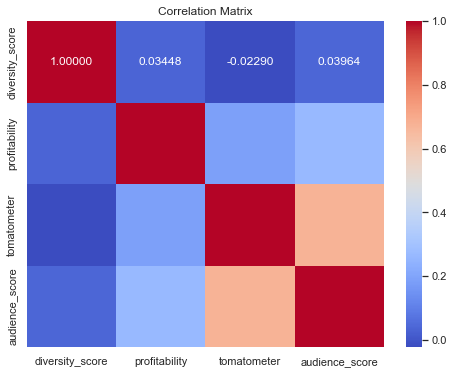

In [54]:


# Select the columns of interest
data = df[['diversity_score', 'profitability', 'tomatometer', 'audience_score']]

# Compute the correlation matrix
corr_matrix = data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".5f")
plt.title('Correlation Matrix')
plt.show()